Chris Hinckley

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


**Use the following nutrition dataset:** https://github.com/bforoura/IDS/blob/main/HW4/nutrition_subset.csvLinks **to an external site. The elements in the data set are food items of various sizes, ranging from a teaspoon of cinnamon to an entire carrot cake.**


In [ ]:
%%R
saturated_fat = read.csv(url("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv"), header=T)

**Sort the data set by saturated_ fat and produce a listing of the five food items highest in saturated fat. Comment on the validity of comparing food items of different sizes.**

In [ ]:
%%R

# Sort the data by 'saturated_fat' in descending order
saturated_fat_sorted <- saturated_fat[order(-saturated_fat$saturated_fat), ]

# Get the top five food items with the highest saturated fat
top_saturated_fat_foods <- head(saturated_fat_sorted, 5)

# Print the top five foods
print(top_saturated_fat_foods)


                                 food.item weight_in_grams saturated_fat
379 CHEESECAKE                    1 CAKE              1110         119.9
536 ICE CREAM; VANLLA; RICH 16% FT1/2 GAL             1188         118.3
459 YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE              1108          92.0
582 CREME PIE                     1 PIE                910          90.1
891 LARD                          1 CUP                205          80.4
    cholesterol
379        2053
536         703
459         609
582          46
891         195


**Create a new variable, saturated_ fat_ per_gram, by dividing the amount of saturated fat by the weight in grams. Sort the data set by saturated_ fat_ per_gram and produce a listing of the five food items highest in saturated fat per gram. Which food has the most saturated fat per gram?**

In [ ]:
%%R
# Create a new variable 'saturated_fat_per_gram'
saturated_fat$saturated_fat_per_gram <- saturated_fat$saturated_fat / saturated_fat$weight_in_grams

# Sort the data by 'saturated_fat_per_gram' in descending order
saturated_fat_sorted <- saturated_fat[order(-saturated_fat$saturated_fat_per_gram), ]

# Get the top five food items with the highest 'saturated_fat_per_gram'
top_saturated_fat_per_gram <- head(saturated_fat_sorted, 5)

# Print the top five foods
print(top_saturated_fat_per_gram)

# The food with the most saturated fat per gram will be the first row in the sorted dataframe
most_saturated_fat_per_gram <- top_saturated_fat_per_gram[1, ]
print(most_saturated_fat_per_gram)


                                 food.item weight_in_grams saturated_fat
909 BUTTER; SALTED                1 TBSP                14           7.1
910 BUTTER; UNSALTED              1 TBSP                14           7.1
710 BUTTER; SALTED                1/2 CUP              113          57.1
711 BUTTER; UNSALTED              1/2 CUP              113          57.1
913 BUTTER; SALTED                1 PAT                  5           2.5
    cholesterol saturated_fat_per_gram
909          31              0.5071429
910          31              0.5071429
710         247              0.5053097
711         247              0.5053097
913          11              0.5000000
                                 food.item weight_in_grams saturated_fat
909 BUTTER; SALTED                1 TBSP                14           7.1
    cholesterol saturated_fat_per_gram
909          31              0.5071429


**Standardize (zero mean) the field saturated_ fat_ per_gram, and produce a listing of all the food items that are outliers at the high end of the scale. How many food items are outliers at the low end of the scale? Create a density plot for saturated_ fat_ per_gram**



                                 food.item weight_in_grams saturated_fat
211 CHOCOLATE; BITTER OT BAKING   1 OZ               28.35           9.0
449 COCONUT; RAW; SHREDDED        1 CUP              80.00          23.8
493 COCONUT; DRIED; SWEETND;SHREDD1 CUP              93.00          29.3
577 COCONUT; RAW; PIECE           1 PIECE            45.00          13.4
710 BUTTER; SALTED                1/2 CUP           113.00          57.1
711 BUTTER; UNSALTED              1/2 CUP           113.00          57.1
891 LARD                          1 CUP             205.00          80.4
899 FATS; COOKING/VEGETBL SHORTENG1 TBSP             13.00           3.3
900 LARD                          1 TBSP             13.00           5.1
908 FATS; COOKING/VEGETBL SHORTENG1 CUP             205.00          51.3
909 BUTTER; SALTED                1 TBSP             14.00           7.1
910 BUTTER; UNSALTED              1 TBSP             14.00           7.1
913 BUTTER; SALTED                1 PAT            

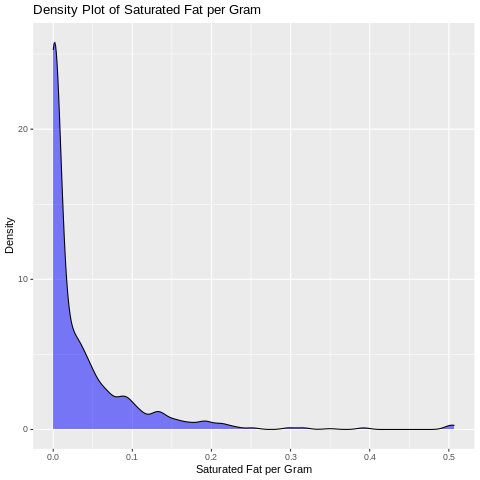

In [ ]:
%%R
# Standardize the 'saturated_fat_per_gram'
saturated_fat$standardized_saturated_fat_per_gram <- scale(saturated_fat$saturated_fat_per_gram)

# Determine outliers - commonly, any value more than 3 or less than -3 standard deviations is considered an outlier
outliers_high <- subset(saturated_fat, standardized_saturated_fat_per_gram > 3)
outliers_low <- subset(saturated_fat, standardized_saturated_fat_per_gram < -3)

# Print the food items that are high-end outliers
print(outliers_high)

# Count and print the number of low-end outliers
number_low_end_outliers <- nrow(outliers_low)
print(number_low_end_outliers)

# Create a density plot for 'saturated_fat_per_gram'
library(ggplot2)
ggplot(saturated_fat, aes(x = saturated_fat_per_gram)) +
  geom_density(fill = "blue", alpha = 0.5) +
  labs(title = "Density Plot of Saturated Fat per Gram",
       x = "Saturated Fat per Gram",
       y = "Density")


**Are there any missing values? If so, impute as necessary and explain your approach.**



In [ ]:
%%R
# Check for missing values in each column
missing_values <- sapply(saturated_fat, function(x) sum(is.na(x)))

# Print the number of missing values for each column
print(missing_values)

# If there are missing values, impute them
# Here, I use mean imputation
saturated_fat <- saturated_fat %>%
  mutate(across(where(is.numeric), ~ifelse(is.na(.), mean(., na.rm = TRUE), .)))


                          food.item                     weight_in_grams 
                                  0                                   0 
                      saturated_fat                         cholesterol 
                                  0                                   0 
             saturated_fat_per_gram standardized_saturated_fat_per_gram 
                                  0                                   0 


**Standardize (zero mean) the numeric variables, and determine if there are any outliers.**

In [ ]:
%%R
library(dplyr)

# Standardize numeric variables
saturated_fat_standardized <- saturated_fat %>%
  mutate(across(where(is.numeric), scale))  # scale() function standardizes data

# Identify outliers
saturated_fat_outliers <- saturated_fat_standardized %>%
  mutate(outlier = ifelse(
    abs(standardized_saturated_fat_per_gram) > 3, "Yes", "No"
  ))

# Count the number of outliers
outliers_count <- sum(saturated_fat_outliers$outlier == "Yes")

# Print the outliers
print(saturated_fat_outliers %>% filter(outlier == "Yes"))

# Print the count of outliers
print(outliers_count)


                                food.item weight_in_grams saturated_fat
1  CHOCOLATE; BITTER OT BAKING   1 OZ          -0.6881917    0.46651298
2  COCONUT; RAW; SHREDDED        1 CUP         -0.3945746    1.84397996
3  COCONUT; DRIED; SWEETND;SHREDD1 CUP         -0.3206729    2.35587648
4  COCONUT; RAW; PIECE           1 PIECE       -0.5935407    0.87603019
5  BUTTER; SALTED                1/2 CUP       -0.2069780    4.94328069
6  BUTTER; UNSALTED              1/2 CUP       -0.2069780    4.94328069
7  LARD                          1 CUP          0.3160186    7.11186048
8  FATS; COOKING/VEGETBL SHORTENG1 TBSP        -0.7754526   -0.06399796
9  LARD                          1 TBSP        -0.7754526    0.10353181
10 FATS; COOKING/VEGETBL SHORTENG1 CUP          0.3160186    4.40346255
11 BUTTER; SALTED                1 TBSP        -0.7697678    0.28967600
12 BUTTER; UNSALTED              1 TBSP        -0.7697678    0.28967600
13 BUTTER; SALTED                1 PAT         -0.8209306   -0.1

**Summary of Findings**